<a href="https://colab.research.google.com/github/Aryan-Gupta2002/Deep-Learning---Tensorflow/blob/main/neuralNetworkForRegression_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

From previous notebook of neural networks for regression analysis

###Evaluating a model  
In practice, a typical workflow , we go through when building a neural network  
Build a model -> fit it -> evaluate it -> tweak the model -> fit it-> evaluate-> repeat  

It's a good idea to visualize the training process :
  
*The data- What are we working with ?  
*The model itself- What does our model look like ?  
*Training the model - how does the model perform ?  
*The prediction of the model - Have a idea about the prediction  

### Making a larger Dataset

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
print(tf.__version__,np.__version__,matplotlib.__version__)

2.19.0 2.0.2 3.10.0


In [2]:
x = tf.range(-100,100,4)
x

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [3]:
y = x+12
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-88, -84, -80, -76, -72, -68, -64, -60, -56, -52, -48, -44, -40,
       -36, -32, -28, -24, -20, -16, -12,  -8,  -4,   0,   4,   8,  12,
        16,  20,  24,  28,  32,  36,  40,  44,  48,  52,  56,  60,  64,
        68,  72,  76,  80,  84,  88,  92,  96, 100, 104, 108], dtype=int32)>

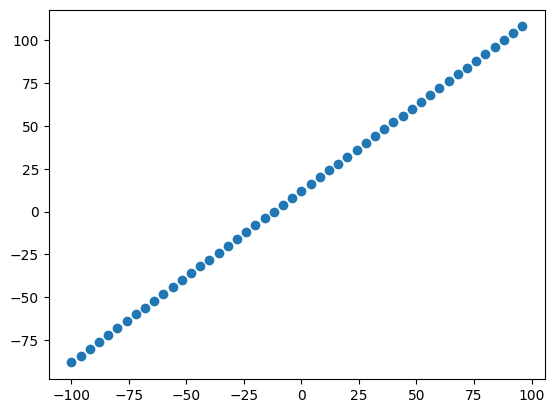

In [4]:
plt.scatter(x,y)

In [5]:
# import tensorflow_datasets as tfds
# ds_train = tfds.load('x', split='train[:75%]')

### The 3 sets of data we need to properly optimize our model  
•Training Set  
•Validation Set (OPTIONAL)  
•Test Set
### Goal: **Generalization** is the ability of a machine learning model to perform well on data, it has not seen before

In [6]:
# Checking how many samples we have
len(x)

50

In [7]:
#Splittimg the data into training and testing sets
x_train = x[:40]
y_train = y[:40]

x_test=x[40:]
y_test =y[40:]
len(x_test),len(x_train),len(y_test),len(y_train)

(10, 40, 10, 40)

###Visualizing the data
Now we seperated out data, we must visualize

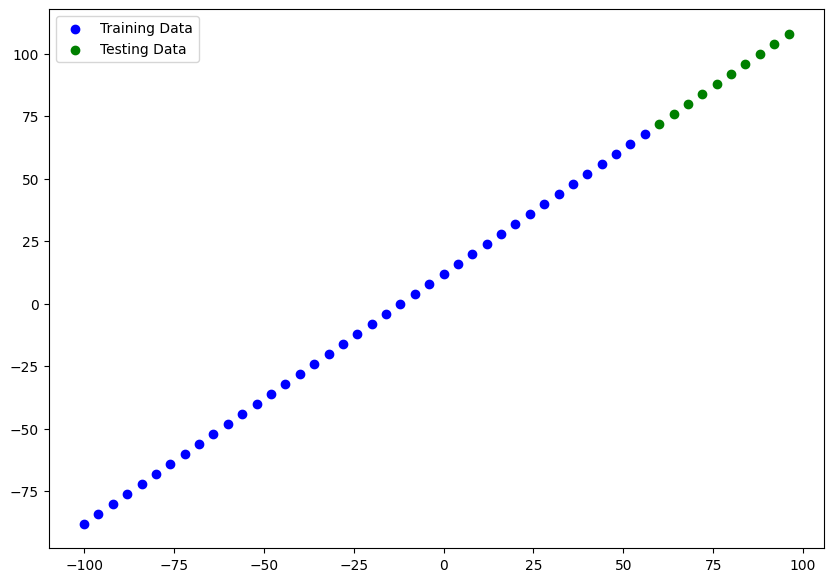

In [8]:
plt.figure(figsize=(10,7))
plt.scatter(x_train,y_train,c="b",label="Training Data")
plt.scatter(x_test,y_test,c="g",label="Testing Data")
plt.legend() #legend() gives information about the different datasets

In [9]:
#Let's Train our model from the above datasets
model1=tf.keras.Sequential([
    tf.keras.layers.Dense(3),
    tf.keras.layers.Dense(1)
])
model1.compile(
    loss=tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.SGD(),
    metrics=["mae"]
)
model1.fit(tf.expand_dims(x_train,axis=-1),y_train,epochs=100)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 66.3798 - mae: 66.3798 
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 12.3278 - mae: 12.3278
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 19.3335 - mae: 19.3335
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 10.2422 - mae: 10.2422
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 19.3392 - mae: 19.3392
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 19.4669 - mae: 19.4669
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 22.5270 - mae: 22.5270
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 27.6987 - mae: 27.6987 
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 15.0973 - mae: 15.0973
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 22.4143 - mae: 22.4143
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 16.9987 - mae: 16.9987
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 11.5065 - mae: 11.5065
Epoch 13/100
2/2 ━━━━━━

tf.expand_dims(x_train,axis=-1)It adds a new dimension (axis) to the tensor  
keras.Dense expects (batch_size, features)    
x_train_exp = tf.expand_dims(x_train, axis=-1)  
x_train_exp.shape  
(1000, 1)  
axis=-1 means “add the new axis at the last position”

### Visualizing Our Model

In [10]:
# input shape tells us, how many input variables are there for each sample
x[0].shape,y[0].shape

(TensorShape([]), TensorShape([]))

In [11]:
tf.random.set_seed(42)
model2=tf.keras.Sequential([
    tf.keras.layers.Dense(2,input_shape=[1],name="Input layer name"),
    tf.keras.layers.Dense(1,name="Second Hidden"),
    tf.keras.layers.Dense(1,name="Output layer")
],name="One of the many models...")
model2.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["mae"]
)
# NOTE: Loss and Metric is set to MAE, model.evaluate() method will give MAE as loss calculated

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
model2.summary()

Model: "One of the many models..."

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Input layer name (Dense)        │ (None, 2)              │             4 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Second Hidden (Dense)           │ (None, 1)              │             3 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output layer (Dense)            │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9 (36.00 B)

 Trainable params: 9 (36.00 B)

 Non-trainable params: 0 (0.00 B)

* Total Params - total no. of parameters in the model.  
*Trainable params- These are the parameters the model can update as it learns  
*Non-trainable params- These params are not updated during training. (this typically occurs when we bring in already learned parameters from models during **transfer learning**)  
**Resource** MITs Introduction to Deep Learning course

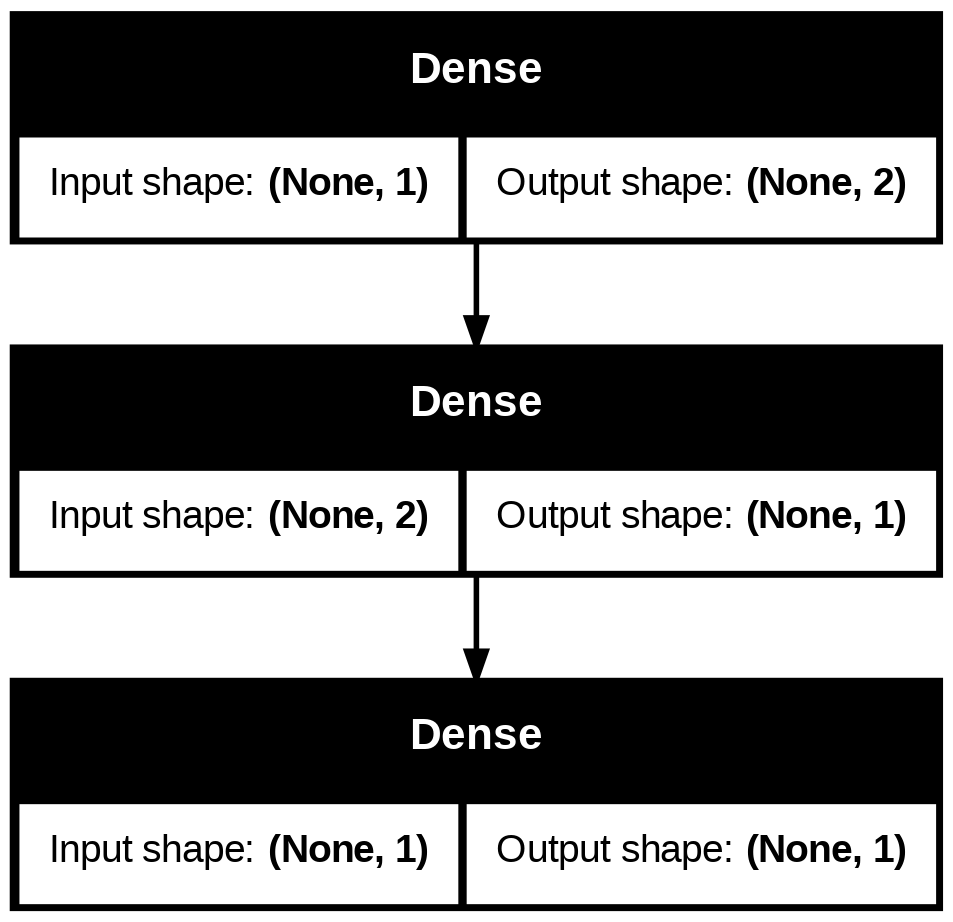

In [13]:
from tensorflow.keras.utils import plot_model
plot_model(model=model2,show_shapes=True)

###Visualizing our model's prediction

In [14]:
y_pred=model1.predict(x_test)
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


array([[55.679993],
       [59.272   ],
       [62.86401 ],
       [66.45602 ],
       [70.04803 ],
       [73.64004 ],
       [77.232056],
       [80.824066],
       [84.41608 ],
       [88.00809 ]], dtype=float32)

In [15]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 72,  76,  80,  84,  88,  92,  96, 100, 104, 108], dtype=int32)>

###Creating a Plotting function

In [16]:
def plot_prediction(training_data=x_train,
                    training_labels=y_train,
                    test_data=x_test,
                    test_labels=y_test,
                    predictions=y_pred):
  plt.figure(figsize=(10,7))
  plt.scatter(training_data,training_labels,c="b",label="training data")
  plt.scatter(test_data,test_labels,c="g",label="test data")
  #Plotting model's predictions in red
  plt.scatter(test_data ,predictions,c="r",label="Predictions")
  plt.legend()

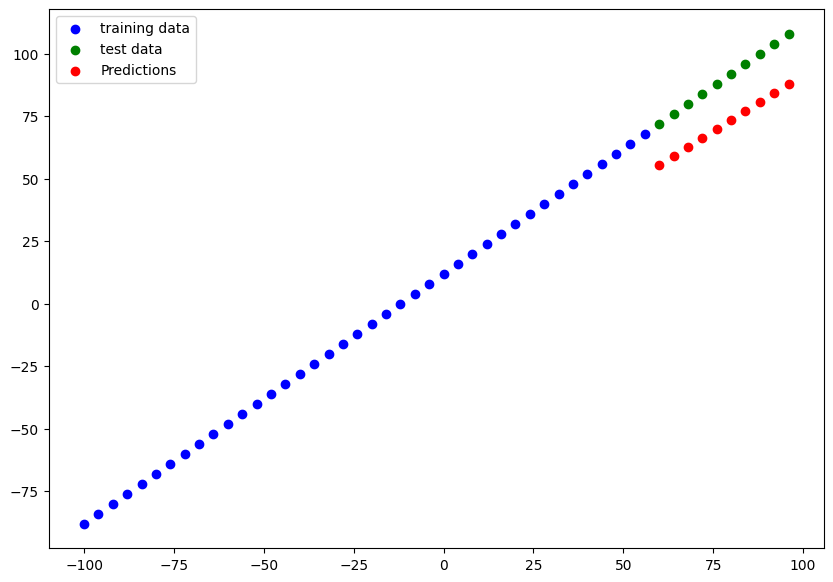

In [17]:
plot_prediction()

###Evaluating our model's predictions with regression evaluation metrics  
There are different types of evaluation metrics such as    
*MSE Mean Squared Error  
*MAE Mean Absolute Error

In [18]:
model1.evaluate(x_test,y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step - loss: 18.1560 - mae: 18.1560


[18.155963897705078, 18.155963897705078]

tf.keras.losses.MAE()  or tf.metrics.mean_absolute_error()  
tf.keras.losses.MSE()  or  tf.metrics.mean_squared_error()  
tf.keras.losses.Huber()  
**Note**- While evaluating the model, keep in mind that the shape of y actual and y predicted should be same.  
**Tip**- you can use tf.squeeze(y_pred)  
tf.squeeze(input) = Given a tensor input, this operation returns a tensor of the same type with all dimensions of size 1 removed. If you don't want to remove all size 1 dimensions, you can remove specific size 1 dimensions by specifying axis.

In [19]:
tf.keras.losses.MAE(y_pred,y_test)

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([17., 17., 18., 18., 18., 19., 19., 20., 20., 20.], dtype=float32)>

In [20]:
y_pred # y_pred is an array but y-test is a tensor

array([[55.679993],
       [59.272   ],
       [62.86401 ],
       [66.45602 ],
       [70.04803 ],
       [73.64004 ],
       [77.232056],
       [80.824066],
       [84.41608 ],
       [88.00809 ]], dtype=float32)

In [21]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 72,  76,  80,  84,  88,  92,  96, 100, 104, 108], dtype=int32)>

In [22]:
y_pred=tf.constant(y_pred) # Shape mismatch

In [23]:
y_pred=tf.squeeze(y_pred)

In [24]:
y_pred

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([55.679993, 59.272   , 62.86401 , 66.45602 , 70.04803 , 73.64004 ,
       77.232056, 80.824066, 84.41608 , 88.00809 ], dtype=float32)>

In [25]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 72,  76,  80,  84,  88,  92,  96, 100, 104, 108], dtype=int32)>

In [26]:
mae1=tf.keras.losses.MAE(y_test,y_pred)
mae1

<tf.Tensor: shape=(), dtype=float32, numpy=18.155963897705078>

In [27]:
mse1=tf.keras.losses.MSE(y_test,y_pred)
mse1

<tf.Tensor: shape=(), dtype=float32, numpy=331.01226806640625>

The Huber Loss Function is a popular loss function used primarily in regression tasks. It is designed to be robust to outliers combining the best properties of two common loss functions: Mean Squared Error (MSE) and Mean Absolute Error (MAE). Unlike MSE, which can be heavily influenced by large errors (outliers) and MAE which can be less sensitive to small errors the Huber loss behaves like MSE for small prediction errors and switches to MAE for larger errors. This is useful when your dataset contains noisy data or outliers, helping models learn more reliably and avoid being skewed by extreme values.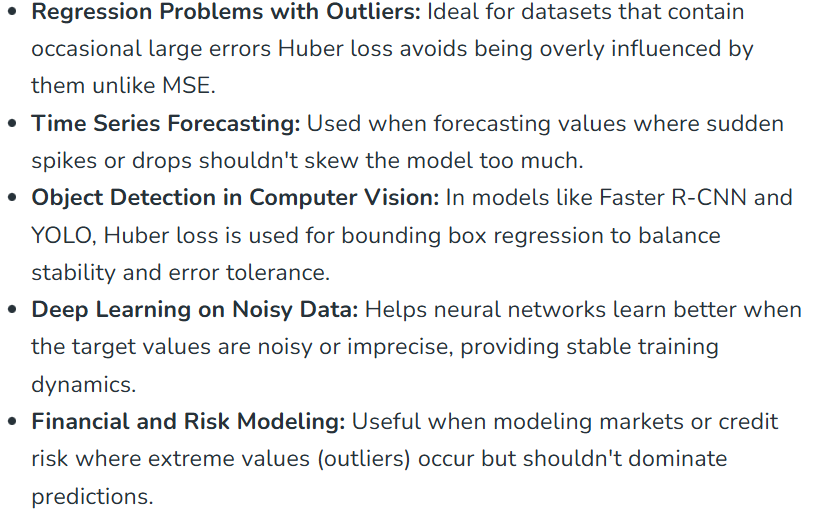

### Running Experiments to improve our Model  
Why tf.random.set_seed(42) before each model?  
Neural networks use randomness for:  
*weight initialization  
*shuffling data  
*dropout (if used)  

If you don’t set the seed, every time you define/train a model:  
*weights start differently  
*loss curves change  
*final MAE changes

In [28]:
tf.random.set_seed(42)
model3=tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])
model3.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["mae"]
)
model3.fit(tf.expand_dims(x_train,axis=-1),y_train,epochs=100)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 20.3525 - mae: 20.3525 
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 10.3606 - mae: 10.3606
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 11.8597 - mae: 11.8597
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 11.3718 - mae: 11.3718
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 13.0851 - mae: 13.0851
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 10.0128 - mae: 10.0128
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 11.4816 - mae: 11.4816
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 13.2307 - mae: 13.2307
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 10.1226 - mae: 10.1226
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 11.6010 - mae: 11.6010
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 11.1338 - mae: 11.1338
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 12.8018 - mae: 12.8018
Epoch 13/100
2/2 ━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
[[55.258152]
 [58.847446]
 [62.43674 ]
 [66.02603 ]
 [69.615326]
 [73.20462 ]
 [76.79391 ]
 [80.3832  ]
 [83.972496]
 [87.56179 ]]


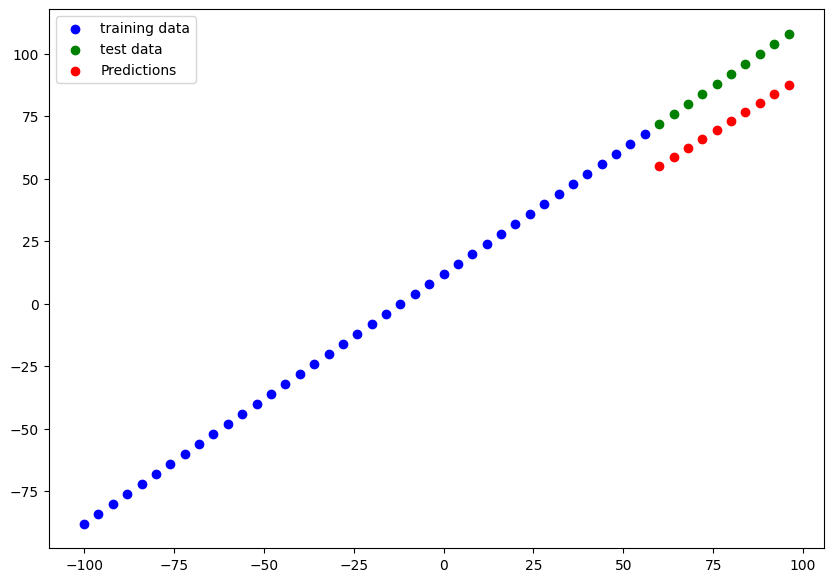

In [29]:
y_pred1=model3.predict(x_test)
print(y_pred1)
plot_prediction(predictions=y_pred1)

In [30]:
mae2=tf.keras.losses.MAE(y_test,tf.squeeze(y_pred1))
mae2

<tf.Tensor: shape=(), dtype=float32, numpy=18.590028762817383>

In [31]:
mse2=tf.keras.losses.MSE(y_test,tf.squeeze(y_pred1))
mse2

<tf.Tensor: shape=(), dtype=float32, numpy=346.98077392578125>

In [32]:
tf.random.set_seed(42)
model4=tf.keras.Sequential([
    tf.keras.layers.Dense(5),
    tf.keras.layers.Dense(1)
])
model4.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["mse"]
)
# NOTE: SGD optimizer updates weights by calculating loss with MAE.
# mse metrics is just to show the output
model4.fit(tf.expand_dims(x_train,axis=-1),y_train,epochs=100)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 80.8915 - mse: 9442.9834  
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 23.1336 - mse: 786.8590
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 12.1762 - mse: 183.3769
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 13.7971 - mse: 209.9428
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 15.3104 - mse: 290.2152
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 17.8416 - mse: 447.8209
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 12.8459 - mse: 176.7828
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 14.0294 - mse: 221.1850
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 15.2334 - mse: 295.1036
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 17.4593 - mse: 427.8701
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 12.5974 - mse: 168.6442
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 13.6529 - mse: 205.9665
Epoch 13/1

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
[[41.046673]
 [43.639603]
 [46.232533]
 [48.825462]
 [51.418392]
 [54.01132 ]
 [56.60425 ]
 [59.19718 ]
 [61.79011 ]
 [64.38304 ]]


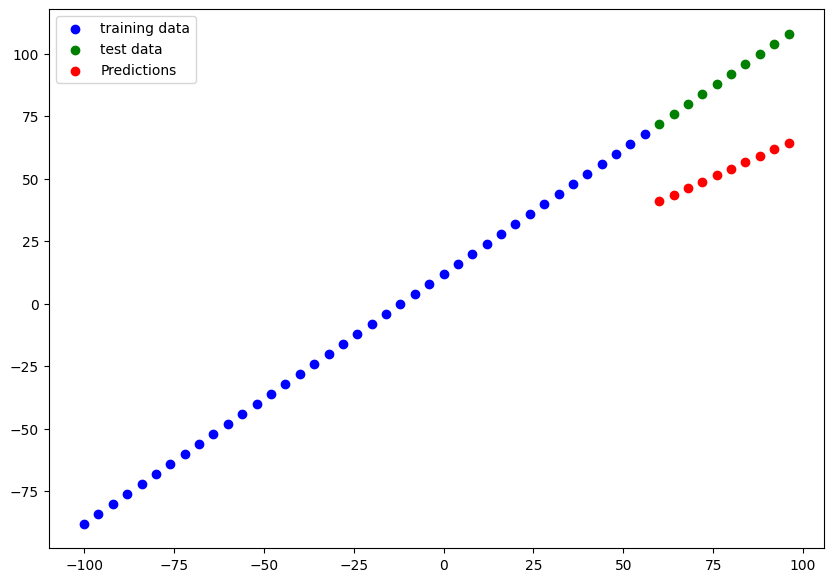

In [33]:
y_pred2=model4.predict(x_test)
print(y_pred2)
plot_prediction(predictions=y_pred2)

In [34]:
mae3=tf.keras.losses.MAE(y_test,tf.squeeze(y_pred2))
mse3=tf.keras.losses.MSE(y_test,tf.squeeze(y_pred2))
mae3,mse3

(<tf.Tensor: shape=(), dtype=float32, numpy=37.2851448059082>,
 <tf.Tensor: shape=(), dtype=float32, numpy=1406.515625>)

In [35]:
tf.random.set_seed(42)
model5=tf.keras.Sequential([
    tf.keras.layers.Dense(5),
    tf.keras.layers.Dense(1)
])
model5.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["mse"]
)
model5.fit(tf.expand_dims(x_train,axis=-1),y_train,epochs=200)


Epoch 1/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 9.3981 - mse: 127.0713 
Epoch 2/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 20.4256 - mse: 561.7536 
Epoch 3/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 13.0046 - mse: 264.0342
Epoch 4/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 16.3593 - mse: 368.4740
Epoch 5/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 12.0559 - mse: 222.5150
Epoch 6/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 11.4034 - mse: 198.1415
Epoch 7/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 11.7009 - mse: 201.6904
Epoch 8/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 12.2238 - mse: 220.1452
Epoch 9/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 11.8259 - mse: 212.2868
Epoch 10/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 11.3147 - mse: 192.3087
Epoch 11/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 11.8471 - mse: 210.8184
Epoch 12/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 11.3549 - mse: 191.7173
Epoch 13/200

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
[[35.547356]
 [37.675724]
 [39.80409 ]
 [41.932457]
 [44.060825]
 [46.189194]
 [48.317562]
 [50.445927]
 [52.5743  ]
 [54.702663]]


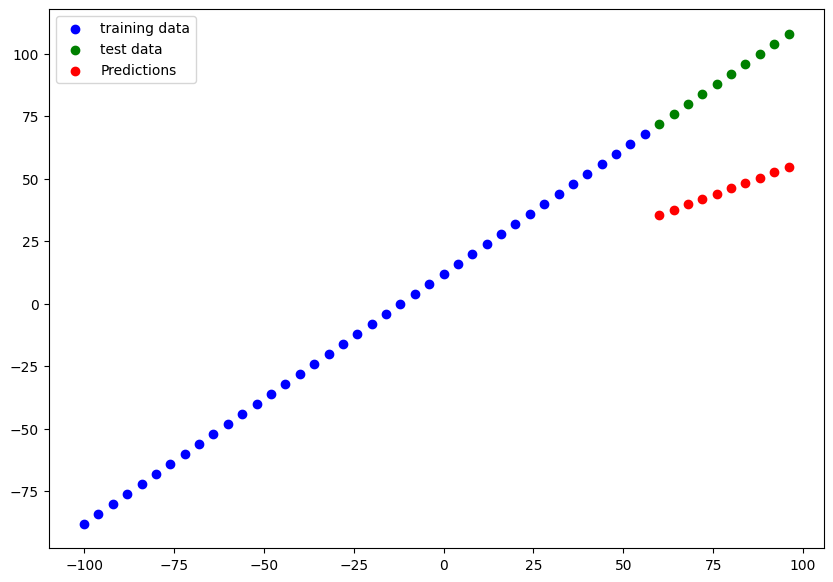

In [36]:
y_pred3=model5.predict(x_test)
print(y_pred3)
plot_prediction(predictions=y_pred3)

In [37]:
mae4=tf.keras.losses.MAE(y_test,tf.squeeze(y_pred3))
mse4=tf.keras.losses.MSE(y_test,tf.squeeze(y_pred3))
mae4,mse4

(<tf.Tensor: shape=(), dtype=float32, numpy=44.8749885559082>,
 <tf.Tensor: shape=(), dtype=float32, numpy=2042.6644287109375>)

In [38]:
tf.random.set_seed(42)
model6=tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])
model6.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["mae"]
)
model6.fit(tf.expand_dims(x_train,axis=-1),y_train,epochs=25)

Epoch 1/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 66.5273 - mae: 66.5273 
Epoch 2/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 31.9465 - mae: 31.9465
Epoch 3/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 10.4811 - mae: 10.4811
Epoch 4/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 11.9938 - mae: 11.9938
Epoch 5/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 11.4924 - mae: 11.4924
Epoch 6/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 13.2358 - mae: 13.2358
Epoch 7/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 10.1334 - mae: 10.1334
Epoch 8/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 11.6094 - mae: 11.6094 
Epoch 9/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 11.1446 - mae: 11.1446
Epoch 10/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 12.8068 - mae: 12.8068 
Epoch 11/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 9.5359 - mae: 9.5359
Epoch 12/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 12.2185 - mae: 12.2185 
Epoch 13/25
2/2 ━━━━━━━━━━━━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
[[50.279205]
 [53.60911 ]
 [56.93902 ]
 [60.268925]
 [63.598827]
 [66.92874 ]
 [70.258644]
 [73.58855 ]
 [76.91846 ]
 [80.24836 ]]


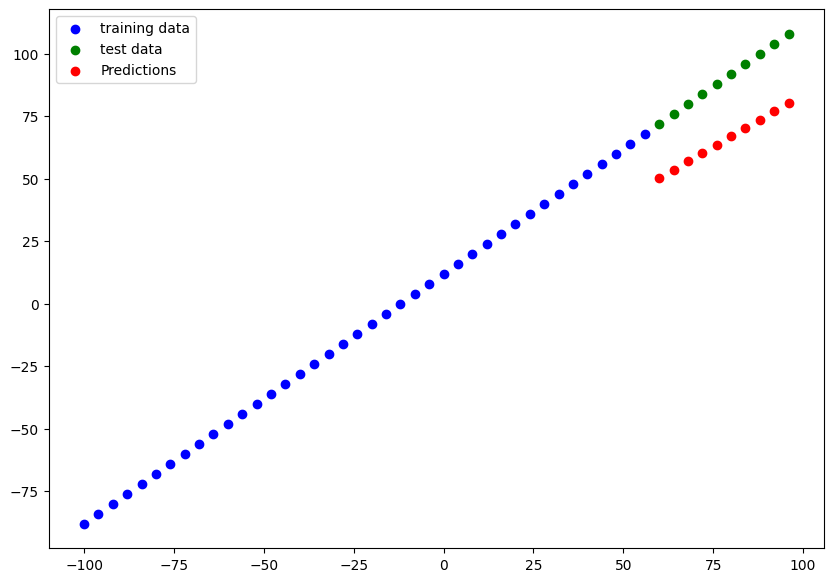

In [39]:
y_pred4=model6.predict(x_test)
print(y_pred4)
plot_prediction(predictions=y_pred4)

In [40]:
mae5=tf.keras.losses.MAE(y_test,tf.squeeze(y_pred4))
mse5=tf.keras.losses.MSE(y_test,tf.squeeze(y_pred4))
mae5,mse5

(<tf.Tensor: shape=(), dtype=float32, numpy=24.736215591430664>,
 <tf.Tensor: shape=(), dtype=float32, numpy=615.5848388671875>)

### Comparing the results of our experiments using pandas

In [42]:
import pandas as pd
model_results=[["model1",mae1.numpy(),mse1.numpy()],
               ["model3",mae2.numpy(),mse2.numpy()],
               ["model4",mae3.numpy(),mse3.numpy()],
               ["model5",mae4.numpy(),mse4.numpy()],
               ["model6",mae5.numpy(),mse5.numpy()]]
all_results=pd.DataFrame(model_results,columns=["model","mae","mse"])
all_results

,model,mae,mse
0,model1,18.155964,331.012268
1,model3,18.590029,346.980774
2,model4,37.285145,1406.515625
3,model5,44.874989,2042.664429
4,model6,24.736216,615.584839


In [43]:
model1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 3)              │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │             4 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12 (52.00 B)

 Trainable params: 10 (40.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [44]:
model3.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4 (20.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

## Tools to track Machine Learning progress  
*Tensorboard- A component of the tensorflow library to help track modelling experiments  
*Weights & Biases- a tool for tracking all kinds of ML experiments(plugs into tensorboard)

#Saving Our Model
Saving our model allows us to use them outside of google colab such as in a web application or a mobile app  
There 2 main formats to save our model  
1.The SavedModel format  
2.The HDF5 format

In [47]:
#Save model using the SaveModel format
model1.export("SavedModel1.keras")

Saved artifact at 'SavedModel1.keras'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 1), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  135001498944336: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135001498946832: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135001498947024: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135001498947792: TensorSpec(shape=(), dtype=tf.resource, name=None)
